In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
np.random.seed(42)
x=np.random.rand(100,1)-0.5
y=3*x[:,0]**2 + 0.05 * np.random.randn(100)  

In [13]:
import pandas as pd

In [15]:
df=pd.DataFrame()

In [19]:
df['x'] = x.reshape(100)
df['y'] = y

In [21]:
df

,x,y
0,-0.125460,0.051573
1,0.450714,0.594480
2,0.231994,0.166052
3,0.098658,-0.070178
4,-0.343981,0.343986
...,...,...
95,-0.006204,-0.040675
96,0.022733,-0.002305
97,-0.072459,0.032809
98,-0.474581,0.689516


Text(0.5, 1.0, 'x vs y')

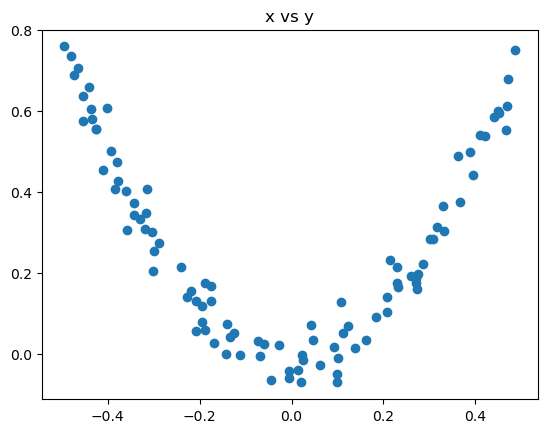

In [25]:
plt.scatter(df['x'],df['y'])
plt.title('x vs y')

In [31]:
# step-1  creat first model
df['pred1'] =df['y'].mean()

In [33]:
df

,x,y,pred1
0,-0.125460,0.051573,0.265458
1,0.450714,0.594480,0.265458
2,0.231994,0.166052,0.265458
3,0.098658,-0.070178,0.265458
4,-0.343981,0.343986,0.265458
...,...,...,...
95,-0.006204,-0.040675,0.265458
96,0.022733,-0.002305,0.265458
97,-0.072459,0.032809,0.265458
98,-0.474581,0.689516,0.265458


In [35]:
# pseud residual
df['res1'] = df['y'] - df['pred1']

In [37]:
df.head()

,x,y,pred1,res1
0,-0.125460,0.051573,0.265458,-0.213885
1,0.450714,0.594480,0.265458,0.329021
2,0.231994,0.166052,0.265458,-0.099407
3,0.098658,-0.070178,0.265458,-0.335636
4,-0.343981,0.343986,0.265458,0.078528


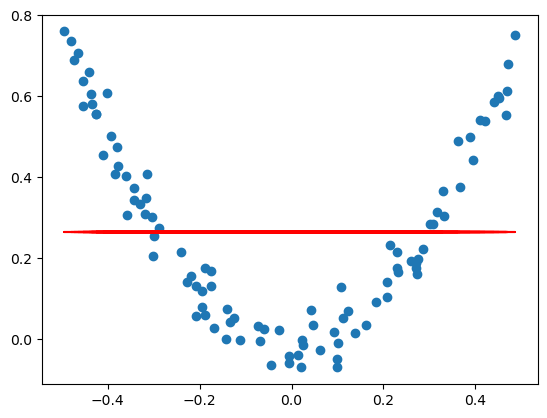

In [45]:
plt.scatter(df['x'],df['y'])
plt.plot(df['x'],df['pred1'],color='red')

In [39]:
from sklearn.tree import DecisionTreeRegressor

In [49]:
# create second model
dtr1 = DecisionTreeRegressor(max_leaf_nodes=8)

In [51]:
dtr1.fit(df['x'].values.reshape(100,1),df['res1'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

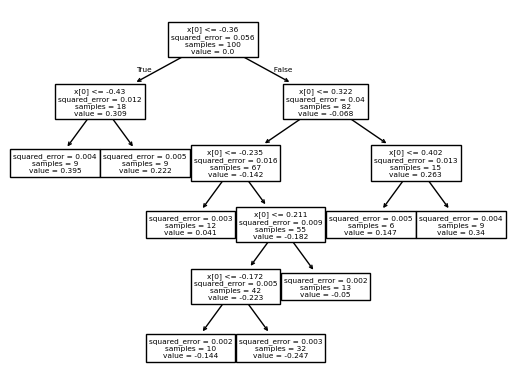

In [61]:
from sklearn.tree import plot_tree
plot_tree(dtr1)
plt.show()

In [63]:
# generating x_test

x_test = np.linspace(-0.5 ,0.5 ,500)

In [65]:
y_pred = 0.265458 + dtr1.predict(x_test.reshape(500,1))

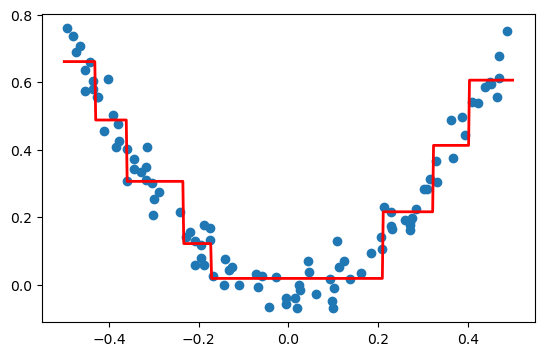

In [69]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(x_test,y_pred ,linewidth=2,color='red')
plt.scatter(df['x'],df['y'])

In [71]:
df['pred2'] = 0.265458 + dtr1.predict(df['x'].values.reshape(100,1))

In [73]:
df

,x,y,pred1,res1,pred2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319
1,0.450714,0.594480,0.265458,0.329021,0.605884
2,0.231994,0.166052,0.265458,-0.099407,0.215784
3,0.098658,-0.070178,0.265458,-0.335636,0.018319
4,-0.343981,0.343986,0.265458,0.078528,0.305964
...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319
96,0.022733,-0.002305,0.265458,-0.267763,0.018319
97,-0.072459,0.032809,0.265458,-0.232650,0.018319
98,-0.474581,0.689516,0.265458,0.424057,0.660912


In [75]:
df['res2'] =df['y']-df['pred2']

In [77]:
df

,x,y,pred1,res1,pred2,res2
0,-0.125460,0.051573,0.265458,-0.213885,0.018319,0.033254
1,0.450714,0.594480,0.265458,0.329021,0.605884,-0.011404
2,0.231994,0.166052,0.265458,-0.099407,0.215784,-0.049732
3,0.098658,-0.070178,0.265458,-0.335636,0.018319,-0.088497
4,-0.343981,0.343986,0.265458,0.078528,0.305964,0.038022
...,...,...,...,...,...,...
95,-0.006204,-0.040675,0.265458,-0.306133,0.018319,-0.058994
96,0.022733,-0.002305,0.265458,-0.267763,0.018319,-0.020624
97,-0.072459,0.032809,0.265458,-0.232650,0.018319,0.014489
98,-0.474581,0.689516,0.265458,0.424057,0.660912,0.028604


In [79]:
dtr2 =DecisionTreeRegressor(max_leaf_nodes=8)

In [81]:

dtr2.fit(df['x'].values.reshape(100,1),df['res2'].values)

DecisionTreeRegressor(max_leaf_nodes=8)

In [83]:
y_pred = 0.265458 + sum(regressor.predict(x_test.reshape(-1, 1)) for regressor in [dtr1,dtr2])
     


Text(0.5, 1.0, 'X vs y')

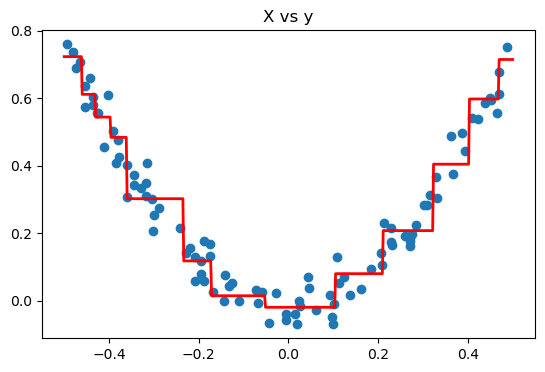

In [87]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.plot(x_test, y_pred, linewidth=2,color='red')
plt.scatter(df['x'],df['y'])
plt.title('X vs y')
     